In [2]:
import csv
from typing import List # Support for Python 3.8 and older

class Result:
    """
    Represents single row of results table, that is:
    Generation, number of played games and 32 run results.
    """
    def __init__(self, generation: int, games_played: int, results: List[float]):
        # Panic when results don't have expected length.
        assert len(results) == 32

        self.generation = generation
        self.games = games_played
        self.results = results

    def avg(self) -> float:
        return sum(self.results) / 32

class Results:
    def __init__(self, rows: List[Result]):
        rows.sort(key = lambda res: res.generation)
        self.box = rows[-1]
        self.x_sup = [x.generation for x in rows]
        self.x_sub = [x.games for x in rows]
        self.avg = [y.avg() for y in rows]

    def avg_results(self):
        return self.x_sub, self.x_sup, self.avg
        # sup_axis = figure.twiny()
        # figure.plot(self.x_sub, self.avg, color = color, marker = marker, markevery = 0.1, label = label)
        # figure.set_xlabel('Rozegranych gier')
        # sup_axis.set_xlim(xmin = self.x_sup[0], xmax = self.x_sup[-1])
        # sup_axis.set_xlabel('Pokolenie')

    def box_results(self):
        return self.box

class Algorithm:
    def __init__(self, path: str):
        results = self._read_file(path)
        x_sub, x_sup, y_axis = results.avg_results()
        box_data = results.box_results()

        # self.name = name
        self.x_sub = x_sub
        self.x_sup = x_sup
        self.y = y_axis
        self.box = box_data
        # self.formatter = formatter

    def _read_file(self, path: str) -> Results:
        with open(path) as file:
            reader = csv.reader(file)
            # Get rid of CSV header
            next(reader)

            rows = []
            for row in reader:
                generation, games, *results = row
                result = Result(int(generation), int(games), [float(result) for result in results])
                rows.append(result)
            return Results(rows)


In [3]:
algorithms = [
    Algorithm("./data/rsel.csv"),
    Algorithm("./data/cel-rs.csv"),
    Algorithm("./data/2cel-rs.csv"),
    Algorithm("./data/cel.csv"),
    Algorithm("./data/2cel.csv")
]

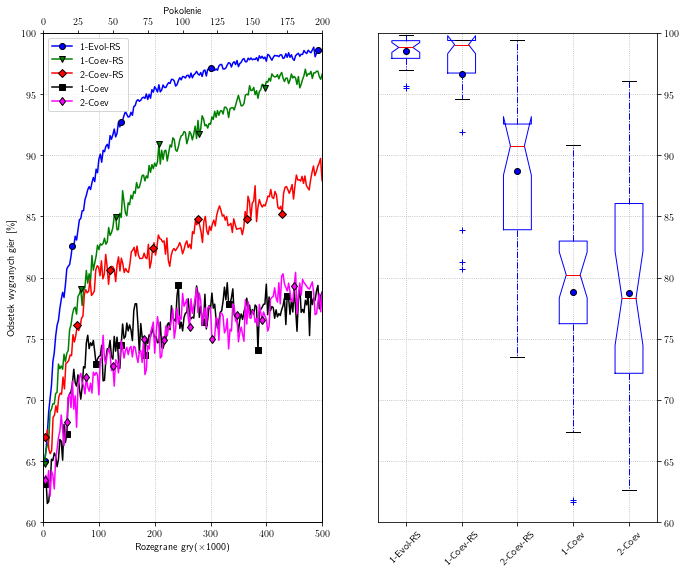

In [13]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True
})

names = ["1-Evol-RS", "1-Coev-RS", "2-Coev-RS", "1-Coev", "2-Coev"]
colors = ['blue', 'green', 'red', 'black', 'magenta']
markers = ['o', 'v', 'D', 's', 'd']

plotstyle = {
    'markeredgecolor': 'black',
    'markevery': 0.4,
}

boxstyle = {
    'boxprops': {
        'color': 'blue'
    },
    'whiskerprops': {
        'linestyle': '-.',
        'color': 'blue'
    },
    'flierprops': {
        'markeredgecolor': 'blue'
    },
    'medianprops': {
        'color': 'red'
    },
    'showmeans': True,
    'meanprops': {
        'marker': 'o',
        'markeredgecolor': 'black',
        'markerfacecolor': 'blue'
    }
}
figure, (plot, box) = plt.subplots(1, 2)
figure.set_size_inches(11, 9)

x_sup = plot.twiny()
x_sup.set_xlim(0, 200)
x_sup.set_xlabel('Pokolenie')
plot.set_xlabel('Rozegrane gry' + r'($\times$1000)')
plot.set_ylabel('Odsetek wygranych gier [\%]')
plot.set_ylim(60, 100)
plot.set_xlim(0, 500)
plot.grid(b=True, linestyle=':')
plot.margins(0)


# Re-scale values
def scale(vector, multiplier): return [val * multiplier for val in vector]
def comprehend(x, i): return [a.y[i] for a in x]

for i, algorithm in enumerate(algorithms):
    plot.plot(scale(algorithm.x_sub, 0.001), scale(algorithm.y, 100), marker = markers[i], color = colors[i], label = names[i], **plotstyle)


values = [scale(a.box.results, 100) for a in algorithms]

box.grid(b=True, linestyle=':')
box.margins(0.005)
box.boxplot(values, sym='+', notch=True, **boxstyle)
box.set_xticklabels(names, rotation=45)
box.yaxis.tick_right()
box.set_ylim(60, 100)

plot.legend()
plt.savefig("plot.pdf")
